In [1]:
import pandas as pd
from IPython.display import display, HTML

# read data from mtcars.csv data set.
cars_df_orig = pd.read_csv("https://s3-us-west-2.amazonaws.com/data-analytics.zybooks.com/mtcars.csv")

# randomly pick 30 observations from the data set to make the data set unique to you.
cars_df = cars_df_orig.sample(n=30, replace=False)

# print only the first five observations in the dataset.
print("Cars data frame (showing only the first five observations)\n")
display(HTML(cars_df.head().to_html()))

Cars data frame (showing only the first five observations)



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


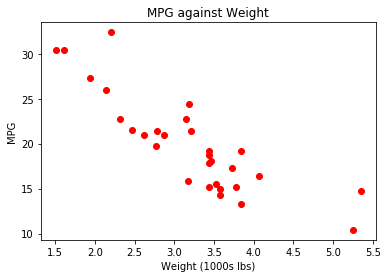

In [2]:
import matplotlib.pyplot as plt

# create scatterplot of variables mpg against wt.
plt.plot(cars_df["wt"], cars_df["mpg"], 'o', color='red')

# set a title for the plot, x-axis, and y-axis.
plt.title('MPG against Weight')
plt.xlabel('Weight (1000s lbs)')
plt.ylabel('MPG')

# show the plot.
plt.show()

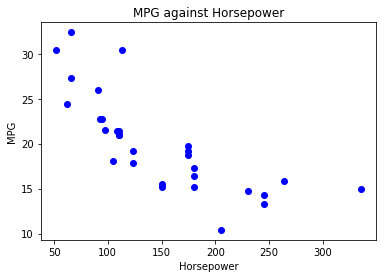

In [3]:
import matplotlib.pyplot as plt

# create scatterplot of variables mpg against hp.
plt.plot(cars_df["hp"], cars_df["mpg"], 'o', color='blue')

# set a title for the plot, x-axis, and y-axis.
plt.title('MPG against Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# show the plot.
plt.show()

In [4]:
# create correlation matrix for mpg, wt, and hp. 
# The correlation coefficient between mpg and wt is contained in the cell for mpg row and wt column (or wt row and mpg column).
# The correlation coefficient between mpg and hp is contained in the cell for mpg row and hp column (or hp row and mpg column).
mpg_wt_corr = cars_df[['mpg','wt','hp']].corr()
print(mpg_wt_corr)

          mpg        wt        hp
mpg  1.000000 -0.852660 -0.766771
wt  -0.852660  1.000000  0.631196
hp  -0.766771  0.631196  1.000000


In [5]:
from statsmodels.formula.api import ols

# create the multiple regression model with mpg as the response variable; weight and horsepower as predictor variables.
model = ols('mpg ~ wt+hp', data=cars_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     59.03
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.39e-10
Time:                        15:17:47   Log-Likelihood:                -67.347
No. Observations:                  30   AIC:                             140.7
Df Residuals:                      27   BIC:                             144.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.2272      1.666     21.747      0.0